Ingesta de datos

In [1]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from ucimlrepo import fetch_ucirepo 

In [2]:
adult = fetch_ucirepo(id=2) 

In [3]:
df = pd.concat([adult.data.features, adult.data.targets], axis=1)
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [4]:
mapeo_sex = {'Female': 1, 'Male': 0}
df['sex'] = df['sex'].map(mapeo_sex)

In [ ]:
# Columnas categóricas a codificar
columnas_categoricas = ['workclass','education','marital-status','occupation','relationship','native-country']

# Inicializar codificadores
encoders = {}
for col in columnas_categoricas:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col].astype(str))
    encoders[col] = le  # Guardamos el encoder para posibles decodificaciones posteriores

In [6]:
# 1) Normaliza la etiqueta: quita espacios y punto final
df['income_clean'] = (
    df['income']
      .astype(str)
      .str.strip()                 # quita espacios al inicio/fin
      .str.replace(r'\.$', '', regex=True)   # elimina punto final si existe
)

# Verifica
print(df['income_clean'].value_counts(dropna=False))

#Reemplazar 
df['income_bin'] = df['income_clean'].map({'>50K': 1, '<=50K': 0})

# Comprueba que no queden NaN por categorías no previstas
print(df['income_bin'].value_counts(dropna=False))

income_clean
<=50K    37155
>50K     11687
Name: count, dtype: int64
income_bin
0    37155
1    11687
Name: count, dtype: int64


In [7]:
# Eliminar la columna 'income' y renombrar 'income_bin' a 'income'
df = df.drop(columns=["income"])
df = df.drop(columns=["income_clean"])
df = df.rename(columns={"income_bin": "income"})

In [8]:
df

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,7,77516,9,13,4,1,1,4,0,2174,0,40,39,0
1,50,6,83311,9,13,2,4,0,4,0,0,0,13,39,0
2,38,4,215646,11,9,0,6,1,4,0,0,0,40,39,0
3,53,4,234721,1,7,2,6,0,2,0,0,0,40,39,0
4,28,4,338409,9,13,2,10,5,2,1,0,0,40,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,39,4,215419,9,13,0,10,1,4,1,0,0,36,39,0
48838,64,9,321403,11,9,6,15,2,2,0,0,0,40,39,0
48839,38,4,374983,9,13,2,10,0,4,0,0,0,50,39,0
48840,44,4,83891,9,13,0,1,3,1,0,5455,0,40,39,0


In [8]:
df_tracking = df.copy()

In [10]:
#valores_unicos = df["workclass"].unique()
#print(valores_unicos)


Denifir columnas a modelar

In [9]:
from sklearn.feature_extraction import DictVectorizer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score, classification_report, f1_score, precision_score, recall_score
import seaborn as sns

<Axes: xlabel='income', ylabel='count'>

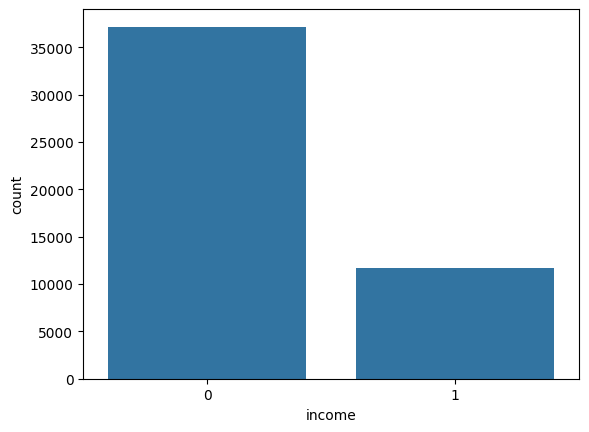

In [12]:
sns.countplot(df, x = "income" )

In [10]:
X = df.drop(["income"],axis=1)
y = df['income']

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y)

Accuracy : 0.8550
F1 Score :0.6699
Precision :0.7356
Sensitividad :0.6149
Especificidad :0.9305


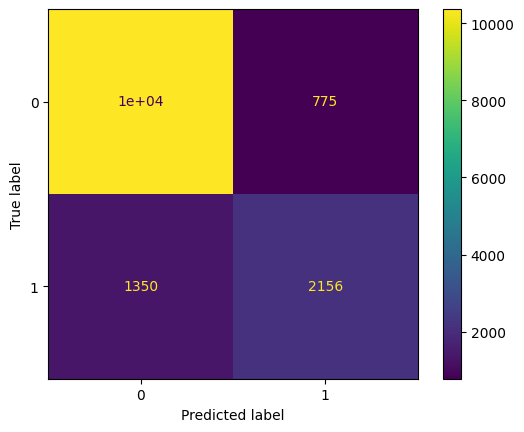

In [12]:
#Definir el modelo
modelo_random = RandomForestClassifier(random_state=42)

#Entrenar el modelo
modelo_random.fit(X_train, y_train)

#Predecir
y_pred = modelo_random.predict(X_test)

#Matriz de confusion
cm = confusion_matrix(y_test, y_pred)
tn, fp, fn, tp = cm.ravel()

#Calcular metrica F1score
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
sensitividad = recall_score(y_test, y_pred)
especificidad = tn / (tn + fp)

#Imprimir metrica
print(f"Accuracy : {accuracy:.4f}")
print(f"F1 Score :{f1:.4f}")
print(f"Precision :{precision:.4f}")
print(f"Sensitividad :{sensitividad:.4f}")
print(f"Especificidad :{especificidad:.4f}")

#Mostrar matriz
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

MLFLOW

In [13]:
from sklearn.feature_extraction import DictVectorizer
import pickle

In [16]:
categorical = [
    'workclass','marital-status','occupation',
    'relationship','native-country',
]
numerical = ['age','education-num','capital-gain','capital-loss','hours-per-week']

In [17]:
df_train, df_val = train_test_split(df, test_size=0.4, random_state=42)

In [18]:
from sklearn.feature_extraction import DictVectorizer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline

df_train = df_train.copy()
df_val   = df_val.copy()
df_train["categorical_dict"] = df_train[categorical].to_dict(orient="records")
df_val["categorical_dict"]   = df_val[categorical].to_dict(orient="records")

# Preprocesador: categóricas via DictVectorizer, numéricas con imputación + escala
preprocessor = ColumnTransformer(
    transformers=[
        ("cat", DictVectorizer(), "categorical_dict"),
        ("num", Pipeline([
            ("imputer", SimpleImputer(strategy="median")),
            ("scaler",  StandardScaler())
        ]), numerical),
    ]
)

X_train = preprocessor.fit_transform(df_train)
y_train = df_train["income"].values
X_val   = preprocessor.transform(df_val)
y_val   = df_val["income"].values

Antes ejecutar esto por terminal donde se encuentra el notebook

mlflow server --backend-store-uri sqlite:///backend.db

In [20]:
import mlflow

mlflow.set_tracking_uri("http://127.0.0.1:5000")

In [21]:
print(f"tracking URI: '{mlflow.get_tracking_uri()}'")

tracking URI: 'http://127.0.0.1:5000'


In [22]:
mlflow.search_experiments()

[<Experiment: artifact_location='file:///C:/Users/ASUS/Documents/6_CURSOS/ESPECIALIZACION/Semestre_II/4_APRENDIZAJE_EN_LA_NUBE/ProyectoMLOps/mlruns/2', creation_time=1759731624770, experiment_id='2', last_update_time=1759731624770, lifecycle_stage='active', name='Ingresos_Xgboost', tags={}>,
 <Experiment: artifact_location='file:///C:/Users/ASUS/Documents/6_CURSOS/ESPECIALIZACION/Semestre_II/4_APRENDIZAJE_EN_LA_NUBE/ProyectoMLOps/mlruns/1', creation_time=1759731141224, experiment_id='1', last_update_time=1759731141224, lifecycle_stage='active', name='Ingresos_Clasificacion', tags={'mlflow.experimentKind': 'custom_model_development'}>,
 <Experiment: artifact_location='file:///C:/Users/ASUS/Documents/6_CURSOS/ESPECIALIZACION/Semestre_II/4_APRENDIZAJE_EN_LA_NUBE/ProyectoMLOps/mlruns/0', creation_time=1759730872974, experiment_id='0', last_update_time=1759730872974, lifecycle_stage='active', name='Default', tags={}>]

RANDOM FOREST

In [23]:
from sklearn.ensemble import RandomForestRegressor,RandomForestClassifier
from sklearn.metrics import mean_squared_error
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

experiment_name = "Ingresos_Clasificacion_RandomForest"
mlflow.set_experiment(experiment_name)

with mlflow.start_run(run_name="RF_balanced"):
    rf = RandomForestClassifier(
        n_estimators=300, 
        random_state=42, 
        max_depth=12,
        n_jobs=-1,
        class_weight="balanced")
    rf.fit(X_train, y_train)
    y_pred = rf.predict(X_val)
    y_proba = rf.predict_proba(X_val)[:,1] if hasattr(rf, "predict_proba") else None
    
    acc = accuracy_score(y_val, y_pred)
    prec = precision_score(y_val, y_pred)
    rec  = recall_score(y_val, y_pred)
    f1   = f1_score(y_val, y_pred)
    roc  = roc_auc_score(y_val, y_proba) if y_proba is not None else float("nan")   
    
    
    mlflow.log_param("n_estimators", 300)
    mlflow.log_param("max_depth", 12)
    mlflow.log_param("class_weight", "balanced")
    mlflow.log_metric("accuracy", accuracy)
    #rmse = np.sqrt(mean_squared_error(y_val, y_pred))
    mlflow.log_metric("precision", prec)
    mlflow.log_metric("recall", rec)
    mlflow.log_metric("f1_score", f1)
    mlflow.log_metric("roc_auc", roc)

    mlflow.sklearn.log_model(rf, artifact_path="model")

print(f"RF -> acc:{acc:.3f} f1:{f1:.3f} prec:{prec:.3f} rec:{rec:.3f} roc:{roc:.3f}")

2025/10/06 13:17:34 INFO mlflow.tracking.fluent: Experiment with name 'Ingresos_Clasificacion_RandomForest' does not exist. Creating a new experiment.
2025/10/06 13:17:36 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/10/06 13:17:46 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run RF_balanced at: http://127.0.0.1:5000/#/experiments/3/runs/a6dca95359654f67b14e3bdbc9003cdc
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/3
RF -> acc:0.821 f1:0.697 prec:0.589 rec:0.855 roc:0.917


XGBOOST

In [26]:
import xgboost as xgb

experiment_name = "Ingresos_Xgboost"
mlflow.set_experiment(experiment_name)

# balanceo para XGB
n_pos = int((y_train == 1).sum())
n_neg = int((y_train == 0).sum())
spw = n_neg / n_pos

with mlflow.start_run(run_name="XGB_spw"):
    xgb_reg = xgb.XGBClassifier(
        objective="binary:logistic",
        eval_metric="logloss",
        n_estimators=400,
        max_depth=6,
        learning_rate=0.1,
        subsample=0.9,
        colsample_bytree=0.9,
        reg_lambda=1.0,
        n_jobs=-1,
        random_state=42,
        scale_pos_weight=spw
    )
    xgb_reg.fit(X_train, y_train)
    y_pred = xgb_reg.predict(X_val)
    y_proba = xgb_reg.predict_proba(X_val)[:,1]

    acc = accuracy_score(y_val, y_pred)
    prec = precision_score(y_val, y_pred)
    rec  = recall_score(y_val, y_pred)
    f1   = f1_score(y_val, y_pred)
    roc  = roc_auc_score(y_val, y_proba)

    mlflow.log_param("scale_pos_weight", round(spw,3))
    mlflow.log_param("n_estimators", 400)
    mlflow.log_param("max_depth", 6)
    mlflow.log_metric("accuracy", acc)
    mlflow.log_metric("precision", prec)
    mlflow.log_metric("recall", rec)
    mlflow.log_metric("f1_score", f1)
    mlflow.log_metric("roc_auc", roc)

    mlflow.sklearn.log_model(xgb_reg, artifact_path="model")

print(f"XGB -> acc:{acc:.3f} f1:{f1:.3f} prec:{prec:.3f} rec:{rec:.3f} roc:{roc:.3f}")

2025/10/06 13:30:49 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/10/06 13:30:54 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run XGB_spw at: http://127.0.0.1:5000/#/experiments/2/runs/74f8ffa534954fe9be8f66ce601b22f9
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/2
XGB -> acc:0.834 f1:0.711 prec:0.614 rec:0.846 roc:0.924


REGRESIÓN LOGISTICA

In [27]:
from sklearn.linear_model import LogisticRegression

experiment_name = "Ingresos_Logistica"
mlflow.set_experiment(experiment_name)


with mlflow.start_run(run_name="LogReg_balanced"):
    log_reg = LogisticRegression(
        max_iter=1000,
        class_weight="balanced",
        n_jobs=None,        
        random_state=42
    )
    log_reg.fit(X_train, y_train)
    y_pred = xgb_reg.predict(X_val)
    if hasattr(log_reg, "predict_proba"):
        y_proba = log_reg.predict_proba(X_val)[:,1]
    else:
        z = log_reg.decision_function(X_val)
        y_proba = (z - z.min()) / (z.max() - z.min() + 1e-9)

    acc = accuracy_score(y_val, y_pred)
    prec = precision_score(y_val, y_pred)
    rec  = recall_score(y_val, y_pred)
    f1   = f1_score(y_val, y_pred)
    roc  = roc_auc_score(y_val, y_proba)

    mlflow.log_param("class_weight", "balanced")
    mlflow.log_param("max_iter", 1000)
    mlflow.log_metric("accuracy", acc)
    mlflow.log_metric("precision", prec)
    mlflow.log_metric("recall", rec)
    mlflow.log_metric("f1_score", f1)
    mlflow.log_metric("roc_auc", roc)

    mlflow.sklearn.log_model(log_reg, artifact_path="model")

print(f"LogReg -> acc:{acc:.3f} f1:{f1:.3f} prec:{prec:.3f} rec:{rec:.3f} roc:{roc:.3f}")

2025/10/06 13:39:56 INFO mlflow.tracking.fluent: Experiment with name 'Ingresos_Logistica' does not exist. Creating a new experiment.
2025/10/06 13:39:59 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/10/06 13:40:06 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run LogReg_balanced at: http://127.0.0.1:5000/#/experiments/4/runs/42e14027bad0444a8361f5a71a2b1fc9
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/4
LogReg -> acc:0.834 f1:0.711 prec:0.614 rec:0.846 roc:0.850


Probando autologgin

In [35]:
import mlflow

experiment_name = "Ingresos_autolog"
mlflow.set_experiment(experiment_name)
mlflow.autolog()

with mlflow.start_run():
    rf = RandomForestRegressor(n_estimators=100, random_state=0, max_depth=10)
    rf.fit(X_train, y_train)
    y_pred = rf.predict(X_val)
    mlflow.log_param("n_estimators", 100)
    mlflow.log_param("max_depth", 10)

    rmse = np.sqrt(mean_squared_error(y_val, y_pred))
    mlflow.log_metric("rmse", rmse)
    mlflow.log_metric("accuracy", accuracy)
    mlflow.log_metric("f1_score", f1)

2025/10/04 14:58:39 INFO mlflow.tracking.fluent: Experiment with name 'Ingresos_autolog' does not exist. Creating a new experiment.
2025/10/04 14:58:43 INFO mlflow.tracking.fluent: Autologging successfully enabled for sklearn.
2025/10/04 14:58:43 INFO mlflow.tracking.fluent: Autologging successfully enabled for xgboost.
2025/10/04 14:58:54 WARNING mlflow.utils.environment: Failed to resolve installed pip version. ``pip`` will be added to conda.yaml environment spec without a version specifier.


🏃 View run spiffy-grub-297 at: http://127.0.0.1:5000/#/experiments/4/runs/c0de723e9876430487f322ba07c8360e
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/4


In [28]:
# ----- AUTLOG activado (XGBoost + scikit-learn) -----
mlflow.set_experiment("Ingresos_autolog")
mlflow.autolog()               
mlflow.xgboost.autolog()       

# ----- Balanceo para la clase positiva ( >50K = 1 ) -----
n_pos = int((y_train == 1).sum())
n_neg = int((y_train == 0).sum())
spw = n_neg / n_pos

with mlflow.start_run(run_name="XGBClassifier_autolog_spw"):
    xgb_clf = xgb.XGBClassifier(
        objective="binary:logistic",   # clasificación binaria
        eval_metric="logloss",         # para que autolog registre esta métrica
        n_estimators=400,
        max_depth=6,
        learning_rate=0.1,
        subsample=0.9,
        colsample_bytree=0.9,
        reg_lambda=1.0,
        n_jobs=-1,
        random_state=42,
        scale_pos_weight=spw           # balanceo de clases
    )

    # eval_set hace que MLflow autologue métricas en validación
    xgb_clf.fit(X_train, y_train, eval_set=[(X_val, y_val)], verbose=False)

    # Predicciones y métricas de CLASIFICACIÓN
    y_pred  = xgb_clf.predict(X_val)
    y_proba = xgb_clf.predict_proba(X_val)[:, 1]

    acc  = accuracy_score(y_val, y_pred)
    prec = precision_score(y_val, y_pred)
    rec  = recall_score(y_val, y_pred)
    f1   = f1_score(y_val, y_pred)
    roc  = roc_auc_score(y_val, y_proba)

    mlflow.log_metric("accuracy", acc)
    mlflow.log_metric("precision", prec)
    mlflow.log_metric("recall", rec)
    mlflow.log_metric("f1_score", f1)
    mlflow.log_metric("roc_auc", roc)

print(f"XGB (autolog) -> acc:{acc:.3f} f1:{f1:.3f} prec:{prec:.3f} rec:{rec:.3f} roc:{roc:.3f}")


2025/10/06 14:15:28 INFO mlflow.tracking.fluent: Experiment with name 'Ingresos_autolog' does not exist. Creating a new experiment.
2025/10/06 14:15:32 INFO mlflow.tracking.fluent: Autologging successfully enabled for sklearn.
2025/10/06 14:15:35 INFO mlflow.tracking.fluent: Autologging successfully enabled for statsmodels.
2025/10/06 14:15:36 INFO mlflow.tracking.fluent: Autologging successfully enabled for xgboost.
2025/10/06 14:15:38 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/10/06 14:15:39 WARNING mlflow.utils.autologging_utils: MLflow autologging encountered a warning: "c:\Users\ASUS\Documents\6_CURSOS\ESPECIALIZACION\Semestre_II\4_APRENDIZAJE_EN_LA_NUBE\ProyectoMLOps\.venv\Lib\site-packages\xgboost\sklearn.py:1028: UserWarning: [14:15:39] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\c_api\c_api.cc:1427: Saving model in the UBJSON format as default.  You can use file extension: `json`, `ubj` or `deprecated` to choose between

🏃 View run XGBClassifier_autolog_spw at: http://127.0.0.1:5000/#/experiments/5/runs/de754150c01548e6a19654df10acaed2
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/5
XGB (autolog) -> acc:0.834 f1:0.711 prec:0.614 rec:0.846 roc:0.924


# **OPTUNA**

In [31]:
import optuna

mlflow.set_experiment("Ingresos_Optuna")


def objective(trial):
    n_pos = np.sum(y_train == 1)
    n_neg = np.sum(y_train == 0)

    # Hiperparámetros que Optuna explorará
    param = {
        "objective": "binary:logistic",
        "eval_metric": "logloss",
        "n_estimators": trial.suggest_int("n_estimators", 100, 500),
        "max_depth": trial.suggest_int("max_depth", 3, 10),
        "learning_rate": trial.suggest_float("learning_rate", 0.01, 0.3),
        "subsample": trial.suggest_float("subsample", 0.6, 1.0),
        "colsample_bytree": trial.suggest_float("colsample_bytree", 0.6, 1.0),
        "gamma": trial.suggest_float("gamma", 0, 5),
        "scale_pos_weight": n_neg / n_pos
    }

    # MLflow registra cada intento como un run
    with mlflow.start_run(nested=True):
        xgb_clf = xgb.XGBClassifier(**param, random_state=42, n_jobs=-1)
        xgb_clf.fit(X_train, y_train)
        y_pred = xgb_clf.predict(X_val)

        f1 = f1_score(y_val, y_pred)
        mlflow.log_metrics({"f1_score": f1})
        mlflow.log_params(param)
    
    return f1  # queremos maximizar F1

# Ejecutar la optimización
study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=25)  

# 🔹 Resultados
print("Mejores parámetros encontrados:")
print(study.best_params)
print(f"Mejor F1 Score: {study.best_value:.4f}")

# Guardar el mejor modelo en MLflow
with mlflow.start_run(run_name="XGB_Optuna_best"):
    best_model = xgb.XGBClassifier(**study.best_params, random_state=42)
    best_model.fit(X_train, y_train)
    mlflow.xgboost.log_model(best_model, "model_best")


[I 2025-10-06 14:46:04,773] A new study created in memory with name: no-name-7fbcb748-a6eb-45b3-84a2-67736149cde7
2025/10/06 14:46:05 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/10/06 14:46:06 WARNING mlflow.utils.autologging_utils: MLflow autologging encountered a warning: "c:\Users\ASUS\Documents\6_CURSOS\ESPECIALIZACION\Semestre_II\4_APRENDIZAJE_EN_LA_NUBE\ProyectoMLOps\.venv\Lib\site-packages\xgboost\sklearn.py:1028: UserWarning: [14:46:06] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\c_api\c_api.cc:1427: Saving model in the UBJSON format as default.  You can use file extension: `json`, `ubj` or `deprecated` to choose between formats."
[I 2025-10-06 14:46:15,512] Trial 0 finished with value: 0.6933871103268633 and parameters: {'n_estimators': 105, 'max_depth': 9, 'learning_rate': 0.015846099638056232, 'subsample': 0.8515002203711728, 'colsample_bytree': 0.7179796270120851, 'gamma': 3.592946007959001}. Best is trial 0 with valu

🏃 View run shivering-doe-94 at: http://127.0.0.1:5000/#/experiments/6/runs/d11095bae1ac41c5ab56367264c550f3
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/6


2025/10/06 14:46:16 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/10/06 14:46:16 WARNING mlflow.utils.autologging_utils: MLflow autologging encountered a warning: "c:\Users\ASUS\Documents\6_CURSOS\ESPECIALIZACION\Semestre_II\4_APRENDIZAJE_EN_LA_NUBE\ProyectoMLOps\.venv\Lib\site-packages\xgboost\sklearn.py:1028: UserWarning: [14:46:16] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\c_api\c_api.cc:1427: Saving model in the UBJSON format as default.  You can use file extension: `json`, `ubj` or `deprecated` to choose between formats."
[I 2025-10-06 14:46:24,739] Trial 1 finished with value: 0.7112546930935126 and parameters: {'n_estimators': 383, 'max_depth': 7, 'learning_rate': 0.02479464663153516, 'subsample': 0.7690025303216553, 'colsample_bytree': 0.654546965339687, 'gamma': 2.6650991214210453}. Best is trial 1 with value: 0.7112546930935126.


🏃 View run unleashed-stoat-658 at: http://127.0.0.1:5000/#/experiments/6/runs/ec36edfe2d3f47ceabaeb06e211ed8bb
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/6


2025/10/06 14:46:25 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/10/06 14:46:25 WARNING mlflow.utils.autologging_utils: MLflow autologging encountered a warning: "c:\Users\ASUS\Documents\6_CURSOS\ESPECIALIZACION\Semestre_II\4_APRENDIZAJE_EN_LA_NUBE\ProyectoMLOps\.venv\Lib\site-packages\xgboost\sklearn.py:1028: UserWarning: [14:46:25] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\c_api\c_api.cc:1427: Saving model in the UBJSON format as default.  You can use file extension: `json`, `ubj` or `deprecated` to choose between formats."
[I 2025-10-06 14:46:33,215] Trial 2 finished with value: 0.7124890829694324 and parameters: {'n_estimators': 499, 'max_depth': 6, 'learning_rate': 0.024567995817913087, 'subsample': 0.6195712721245177, 'colsample_bytree': 0.8020451997999477, 'gamma': 0.8576044253983917}. Best is trial 2 with value: 0.7124890829694324.


🏃 View run nosy-wasp-672 at: http://127.0.0.1:5000/#/experiments/6/runs/fc55f3ef03314623bacf70c3a3cad43f
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/6


2025/10/06 14:46:33 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/10/06 14:46:33 WARNING mlflow.utils.autologging_utils: MLflow autologging encountered a warning: "c:\Users\ASUS\Documents\6_CURSOS\ESPECIALIZACION\Semestre_II\4_APRENDIZAJE_EN_LA_NUBE\ProyectoMLOps\.venv\Lib\site-packages\xgboost\sklearn.py:1028: UserWarning: [14:46:33] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\c_api\c_api.cc:1427: Saving model in the UBJSON format as default.  You can use file extension: `json`, `ubj` or `deprecated` to choose between formats."
[I 2025-10-06 14:46:39,341] Trial 3 finished with value: 0.701821006300164 and parameters: {'n_estimators': 202, 'max_depth': 3, 'learning_rate': 0.07509093429994067, 'subsample': 0.7645063846525696, 'colsample_bytree': 0.7444028116489061, 'gamma': 2.0628184834724523}. Best is trial 2 with value: 0.7124890829694324.


🏃 View run popular-fish-568 at: http://127.0.0.1:5000/#/experiments/6/runs/0345b5fe999f48a4b1fb6eac2b523f25
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/6


2025/10/06 14:46:39 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/10/06 14:46:40 WARNING mlflow.utils.autologging_utils: MLflow autologging encountered a warning: "c:\Users\ASUS\Documents\6_CURSOS\ESPECIALIZACION\Semestre_II\4_APRENDIZAJE_EN_LA_NUBE\ProyectoMLOps\.venv\Lib\site-packages\xgboost\sklearn.py:1028: UserWarning: [14:46:40] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\c_api\c_api.cc:1427: Saving model in the UBJSON format as default.  You can use file extension: `json`, `ubj` or `deprecated` to choose between formats."
[I 2025-10-06 14:46:45,427] Trial 4 finished with value: 0.7112970711297071 and parameters: {'n_estimators': 391, 'max_depth': 4, 'learning_rate': 0.0952967932586251, 'subsample': 0.8869459472068546, 'colsample_bytree': 0.7033839566686588, 'gamma': 2.9322215191921286}. Best is trial 2 with value: 0.7124890829694324.


🏃 View run trusting-cub-464 at: http://127.0.0.1:5000/#/experiments/6/runs/d9a52f36e88044fcb1e686d2fbed0e7c
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/6


2025/10/06 14:46:45 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/10/06 14:46:45 WARNING mlflow.utils.autologging_utils: MLflow autologging encountered a warning: "c:\Users\ASUS\Documents\6_CURSOS\ESPECIALIZACION\Semestre_II\4_APRENDIZAJE_EN_LA_NUBE\ProyectoMLOps\.venv\Lib\site-packages\xgboost\sklearn.py:1028: UserWarning: [14:46:45] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\c_api\c_api.cc:1427: Saving model in the UBJSON format as default.  You can use file extension: `json`, `ubj` or `deprecated` to choose between formats."
[I 2025-10-06 14:46:51,778] Trial 5 finished with value: 0.6984670720219235 and parameters: {'n_estimators': 127, 'max_depth': 3, 'learning_rate': 0.08881193860165451, 'subsample': 0.9126392295624473, 'colsample_bytree': 0.6258331344513757, 'gamma': 1.9769012652462092}. Best is trial 2 with value: 0.7124890829694324.


🏃 View run flawless-goose-374 at: http://127.0.0.1:5000/#/experiments/6/runs/74e6564fb893413d9fb0533b29b743a4
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/6


2025/10/06 14:46:52 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/10/06 14:46:52 WARNING mlflow.utils.autologging_utils: MLflow autologging encountered a warning: "c:\Users\ASUS\Documents\6_CURSOS\ESPECIALIZACION\Semestre_II\4_APRENDIZAJE_EN_LA_NUBE\ProyectoMLOps\.venv\Lib\site-packages\xgboost\sklearn.py:1028: UserWarning: [14:46:52] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\c_api\c_api.cc:1427: Saving model in the UBJSON format as default.  You can use file extension: `json`, `ubj` or `deprecated` to choose between formats."
[I 2025-10-06 14:46:57,804] Trial 6 finished with value: 0.7081636267044449 and parameters: {'n_estimators': 206, 'max_depth': 7, 'learning_rate': 0.29165751227788805, 'subsample': 0.675746625922184, 'colsample_bytree': 0.9687798468036536, 'gamma': 3.4978407017245776}. Best is trial 2 with value: 0.7124890829694324.


🏃 View run bald-goat-619 at: http://127.0.0.1:5000/#/experiments/6/runs/31e9150a4c114fb99dd7be2b7552a6c5
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/6


2025/10/06 14:46:58 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/10/06 14:46:58 WARNING mlflow.utils.autologging_utils: MLflow autologging encountered a warning: "c:\Users\ASUS\Documents\6_CURSOS\ESPECIALIZACION\Semestre_II\4_APRENDIZAJE_EN_LA_NUBE\ProyectoMLOps\.venv\Lib\site-packages\xgboost\sklearn.py:1028: UserWarning: [14:46:58] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\c_api\c_api.cc:1427: Saving model in the UBJSON format as default.  You can use file extension: `json`, `ubj` or `deprecated` to choose between formats."
[I 2025-10-06 14:47:04,027] Trial 7 finished with value: 0.7066381156316917 and parameters: {'n_estimators': 281, 'max_depth': 7, 'learning_rate': 0.26366176440041744, 'subsample': 0.7216676080069762, 'colsample_bytree': 0.7881151694026338, 'gamma': 2.381666956142915}. Best is trial 2 with value: 0.7124890829694324.


🏃 View run glamorous-dog-417 at: http://127.0.0.1:5000/#/experiments/6/runs/782b0a13d2d84f5cac96c2dd89cfe9ba
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/6


2025/10/06 14:47:04 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/10/06 14:47:04 WARNING mlflow.utils.autologging_utils: MLflow autologging encountered a warning: "c:\Users\ASUS\Documents\6_CURSOS\ESPECIALIZACION\Semestre_II\4_APRENDIZAJE_EN_LA_NUBE\ProyectoMLOps\.venv\Lib\site-packages\xgboost\sklearn.py:1028: UserWarning: [14:47:04] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\c_api\c_api.cc:1427: Saving model in the UBJSON format as default.  You can use file extension: `json`, `ubj` or `deprecated` to choose between formats."
[I 2025-10-06 14:47:11,328] Trial 8 finished with value: 0.7121745249824067 and parameters: {'n_estimators': 442, 'max_depth': 10, 'learning_rate': 0.05018300436658051, 'subsample': 0.7034935056400256, 'colsample_bytree': 0.6546235737701752, 'gamma': 3.6463926167614873}. Best is trial 2 with value: 0.7124890829694324.


🏃 View run likeable-ram-14 at: http://127.0.0.1:5000/#/experiments/6/runs/3923cf6d3e0e4de4ab59721aa0ef2c34
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/6


2025/10/06 14:47:12 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/10/06 14:47:12 WARNING mlflow.utils.autologging_utils: MLflow autologging encountered a warning: "c:\Users\ASUS\Documents\6_CURSOS\ESPECIALIZACION\Semestre_II\4_APRENDIZAJE_EN_LA_NUBE\ProyectoMLOps\.venv\Lib\site-packages\xgboost\sklearn.py:1028: UserWarning: [14:47:12] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\c_api\c_api.cc:1427: Saving model in the UBJSON format as default.  You can use file extension: `json`, `ubj` or `deprecated` to choose between formats."
[I 2025-10-06 14:47:17,569] Trial 9 finished with value: 0.7121968304001401 and parameters: {'n_estimators': 395, 'max_depth': 10, 'learning_rate': 0.10645134321660511, 'subsample': 0.6996754689820898, 'colsample_bytree': 0.7081478689782595, 'gamma': 4.093745064088706}. Best is trial 2 with value: 0.7124890829694324.


🏃 View run capricious-ram-854 at: http://127.0.0.1:5000/#/experiments/6/runs/d3990a64baf34251a0c15913f24e55e9
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/6


2025/10/06 14:47:18 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/10/06 14:47:18 WARNING mlflow.utils.autologging_utils: MLflow autologging encountered a warning: "c:\Users\ASUS\Documents\6_CURSOS\ESPECIALIZACION\Semestre_II\4_APRENDIZAJE_EN_LA_NUBE\ProyectoMLOps\.venv\Lib\site-packages\xgboost\sklearn.py:1028: UserWarning: [14:47:18] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\c_api\c_api.cc:1427: Saving model in the UBJSON format as default.  You can use file extension: `json`, `ubj` or `deprecated` to choose between formats."
[I 2025-10-06 14:47:23,993] Trial 10 finished with value: 0.7081270812708127 and parameters: {'n_estimators': 494, 'max_depth': 5, 'learning_rate': 0.17409465012365466, 'subsample': 0.6050090661617301, 'colsample_bytree': 0.8991666425285232, 'gamma': 0.2967634214669781}. Best is trial 2 with value: 0.7124890829694324.


🏃 View run sedate-frog-432 at: http://127.0.0.1:5000/#/experiments/6/runs/f061640b74eb47f9873ed9a5f2903534
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/6


2025/10/06 14:47:24 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/10/06 14:47:24 WARNING mlflow.utils.autologging_utils: MLflow autologging encountered a warning: "c:\Users\ASUS\Documents\6_CURSOS\ESPECIALIZACION\Semestre_II\4_APRENDIZAJE_EN_LA_NUBE\ProyectoMLOps\.venv\Lib\site-packages\xgboost\sklearn.py:1028: UserWarning: [14:47:24] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\c_api\c_api.cc:1427: Saving model in the UBJSON format as default.  You can use file extension: `json`, `ubj` or `deprecated` to choose between formats."
[I 2025-10-06 14:47:30,161] Trial 11 finished with value: 0.7086197778952935 and parameters: {'n_estimators': 483, 'max_depth': 9, 'learning_rate': 0.15555995117593333, 'subsample': 0.6006376874766985, 'colsample_bytree': 0.8529464346329377, 'gamma': 4.871002801137044}. Best is trial 2 with value: 0.7124890829694324.


🏃 View run clumsy-owl-760 at: http://127.0.0.1:5000/#/experiments/6/runs/b90cbe209cd542a7848b83d3592519fd
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/6


2025/10/06 14:47:30 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/10/06 14:47:30 WARNING mlflow.utils.autologging_utils: MLflow autologging encountered a warning: "c:\Users\ASUS\Documents\6_CURSOS\ESPECIALIZACION\Semestre_II\4_APRENDIZAJE_EN_LA_NUBE\ProyectoMLOps\.venv\Lib\site-packages\xgboost\sklearn.py:1028: UserWarning: [14:47:30] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\c_api\c_api.cc:1427: Saving model in the UBJSON format as default.  You can use file extension: `json`, `ubj` or `deprecated` to choose between formats."
[I 2025-10-06 14:47:35,936] Trial 12 finished with value: 0.7114652501106684 and parameters: {'n_estimators': 371, 'max_depth': 5, 'learning_rate': 0.12467640488401027, 'subsample': 0.6530871325743715, 'colsample_bytree': 0.8089162924340807, 'gamma': 0.7392461526804881}. Best is trial 2 with value: 0.7124890829694324.


🏃 View run aged-stoat-659 at: http://127.0.0.1:5000/#/experiments/6/runs/feef9efbd6434bb8927b7c6553599bf5
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/6


2025/10/06 14:47:36 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/10/06 14:47:36 WARNING mlflow.utils.autologging_utils: MLflow autologging encountered a warning: "c:\Users\ASUS\Documents\6_CURSOS\ESPECIALIZACION\Semestre_II\4_APRENDIZAJE_EN_LA_NUBE\ProyectoMLOps\.venv\Lib\site-packages\xgboost\sklearn.py:1028: UserWarning: [14:47:36] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\c_api\c_api.cc:1427: Saving model in the UBJSON format as default.  You can use file extension: `json`, `ubj` or `deprecated` to choose between formats."
[I 2025-10-06 14:47:42,812] Trial 13 finished with value: 0.710826703562781 and parameters: {'n_estimators': 321, 'max_depth': 6, 'learning_rate': 0.21219744082210162, 'subsample': 0.9630456369115992, 'colsample_bytree': 0.7929402946803307, 'gamma': 4.808650911412562}. Best is trial 2 with value: 0.7124890829694324.


🏃 View run lyrical-frog-607 at: http://127.0.0.1:5000/#/experiments/6/runs/1f03857e8cfa43209fadf898b57814f4
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/6


2025/10/06 14:47:44 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/10/06 14:47:44 WARNING mlflow.utils.autologging_utils: MLflow autologging encountered a warning: "c:\Users\ASUS\Documents\6_CURSOS\ESPECIALIZACION\Semestre_II\4_APRENDIZAJE_EN_LA_NUBE\ProyectoMLOps\.venv\Lib\site-packages\xgboost\sklearn.py:1028: UserWarning: [14:47:44] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\c_api\c_api.cc:1427: Saving model in the UBJSON format as default.  You can use file extension: `json`, `ubj` or `deprecated` to choose between formats."
[I 2025-10-06 14:47:50,628] Trial 14 finished with value: 0.7031539888682746 and parameters: {'n_estimators': 437, 'max_depth': 8, 'learning_rate': 0.1240900329491548, 'subsample': 0.6480807549778622, 'colsample_bytree': 0.8747426601808579, 'gamma': 1.225753800230478}. Best is trial 2 with value: 0.7124890829694324.


🏃 View run kindly-hen-349 at: http://127.0.0.1:5000/#/experiments/6/runs/2ca03361858b4c1baca2a645a904b2ce
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/6


2025/10/06 14:47:52 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/10/06 14:47:52 WARNING mlflow.utils.autologging_utils: MLflow autologging encountered a warning: "c:\Users\ASUS\Documents\6_CURSOS\ESPECIALIZACION\Semestre_II\4_APRENDIZAJE_EN_LA_NUBE\ProyectoMLOps\.venv\Lib\site-packages\xgboost\sklearn.py:1028: UserWarning: [14:47:52] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\c_api\c_api.cc:1427: Saving model in the UBJSON format as default.  You can use file extension: `json`, `ubj` or `deprecated` to choose between formats."
[I 2025-10-06 14:47:57,397] Trial 15 finished with value: 0.7103953677734551 and parameters: {'n_estimators': 438, 'max_depth': 10, 'learning_rate': 0.05636729174987297, 'subsample': 0.7327454611103645, 'colsample_bytree': 0.7516597023292445, 'gamma': 1.3264400606337468}. Best is trial 2 with value: 0.7124890829694324.


🏃 View run learned-trout-606 at: http://127.0.0.1:5000/#/experiments/6/runs/3c54428e8d7b481eb1f9799b671cbfd0
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/6


2025/10/06 14:47:57 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/10/06 14:47:57 WARNING mlflow.utils.autologging_utils: MLflow autologging encountered a warning: "c:\Users\ASUS\Documents\6_CURSOS\ESPECIALIZACION\Semestre_II\4_APRENDIZAJE_EN_LA_NUBE\ProyectoMLOps\.venv\Lib\site-packages\xgboost\sklearn.py:1028: UserWarning: [14:47:57] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\c_api\c_api.cc:1427: Saving model in the UBJSON format as default.  You can use file extension: `json`, `ubj` or `deprecated` to choose between formats."
[I 2025-10-06 14:48:02,929] Trial 16 finished with value: 0.7111459968602826 and parameters: {'n_estimators': 324, 'max_depth': 6, 'learning_rate': 0.2195916112941566, 'subsample': 0.8224302961335953, 'colsample_bytree': 0.6967744617356447, 'gamma': 4.184773294074823}. Best is trial 2 with value: 0.7124890829694324.


🏃 View run spiffy-cow-248 at: http://127.0.0.1:5000/#/experiments/6/runs/54d8156037554562ad64c0b27d47ddd1
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/6


2025/10/06 14:48:04 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/10/06 14:48:04 WARNING mlflow.utils.autologging_utils: MLflow autologging encountered a warning: "c:\Users\ASUS\Documents\6_CURSOS\ESPECIALIZACION\Semestre_II\4_APRENDIZAJE_EN_LA_NUBE\ProyectoMLOps\.venv\Lib\site-packages\xgboost\sklearn.py:1028: UserWarning: [14:48:04] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\c_api\c_api.cc:1427: Saving model in the UBJSON format as default.  You can use file extension: `json`, `ubj` or `deprecated` to choose between formats."
[I 2025-10-06 14:48:09,519] Trial 17 finished with value: 0.6941221228837741 and parameters: {'n_estimators': 494, 'max_depth': 8, 'learning_rate': 0.1239738736527671, 'subsample': 0.6650466834427797, 'colsample_bytree': 0.9699491301126267, 'gamma': 0.17039567641517295}. Best is trial 2 with value: 0.7124890829694324.


🏃 View run casual-bat-999 at: http://127.0.0.1:5000/#/experiments/6/runs/e1a02a92d71849649b355c8c7a52b66c
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/6


2025/10/06 14:48:10 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/10/06 14:48:10 WARNING mlflow.utils.autologging_utils: MLflow autologging encountered a warning: "c:\Users\ASUS\Documents\6_CURSOS\ESPECIALIZACION\Semestre_II\4_APRENDIZAJE_EN_LA_NUBE\ProyectoMLOps\.venv\Lib\site-packages\xgboost\sklearn.py:1028: UserWarning: [14:48:10] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\c_api\c_api.cc:1427: Saving model in the UBJSON format as default.  You can use file extension: `json`, `ubj` or `deprecated` to choose between formats."
[I 2025-10-06 14:48:15,862] Trial 18 finished with value: 0.708878302295366 and parameters: {'n_estimators': 279, 'max_depth': 5, 'learning_rate': 0.0390013438653494, 'subsample': 0.778037760949296, 'colsample_bytree': 0.6024192367247958, 'gamma': 1.5933325928786517}. Best is trial 2 with value: 0.7124890829694324.


🏃 View run stately-hog-700 at: http://127.0.0.1:5000/#/experiments/6/runs/dae4f8e1fad24756832a76c7b0ab9eb9
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/6


2025/10/06 14:48:16 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/10/06 14:48:16 WARNING mlflow.utils.autologging_utils: MLflow autologging encountered a warning: "c:\Users\ASUS\Documents\6_CURSOS\ESPECIALIZACION\Semestre_II\4_APRENDIZAJE_EN_LA_NUBE\ProyectoMLOps\.venv\Lib\site-packages\xgboost\sklearn.py:1028: UserWarning: [14:48:16] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\c_api\c_api.cc:1427: Saving model in the UBJSON format as default.  You can use file extension: `json`, `ubj` or `deprecated` to choose between formats."
[I 2025-10-06 14:48:22,603] Trial 19 finished with value: 0.7080734428533778 and parameters: {'n_estimators': 414, 'max_depth': 8, 'learning_rate': 0.19349456818220317, 'subsample': 0.6225594276011936, 'colsample_bytree': 0.8330472561506347, 'gamma': 4.355678055512402}. Best is trial 2 with value: 0.7124890829694324.


🏃 View run judicious-goat-87 at: http://127.0.0.1:5000/#/experiments/6/runs/03675632844048018df57fd9983a1ccb
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/6


2025/10/06 14:48:23 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/10/06 14:48:23 WARNING mlflow.utils.autologging_utils: MLflow autologging encountered a warning: "c:\Users\ASUS\Documents\6_CURSOS\ESPECIALIZACION\Semestre_II\4_APRENDIZAJE_EN_LA_NUBE\ProyectoMLOps\.venv\Lib\site-packages\xgboost\sklearn.py:1028: UserWarning: [14:48:23] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\c_api\c_api.cc:1427: Saving model in the UBJSON format as default.  You can use file extension: `json`, `ubj` or `deprecated` to choose between formats."
[I 2025-10-06 14:48:28,574] Trial 20 finished with value: 0.7129376488226475 and parameters: {'n_estimators': 363, 'max_depth': 9, 'learning_rate': 0.09730800184798082, 'subsample': 0.6852826628241349, 'colsample_bytree': 0.7571969384863063, 'gamma': 3.0783406086028053}. Best is trial 20 with value: 0.7129376488226475.


🏃 View run fearless-bee-800 at: http://127.0.0.1:5000/#/experiments/6/runs/d57bb1413c5a49199203d0d2e24f65be
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/6


2025/10/06 14:48:29 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/10/06 14:48:29 WARNING mlflow.utils.autologging_utils: MLflow autologging encountered a warning: "c:\Users\ASUS\Documents\6_CURSOS\ESPECIALIZACION\Semestre_II\4_APRENDIZAJE_EN_LA_NUBE\ProyectoMLOps\.venv\Lib\site-packages\xgboost\sklearn.py:1028: UserWarning: [14:48:29] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\c_api\c_api.cc:1427: Saving model in the UBJSON format as default.  You can use file extension: `json`, `ubj` or `deprecated` to choose between formats."
[I 2025-10-06 14:48:34,410] Trial 21 finished with value: 0.7125242205390171 and parameters: {'n_estimators': 339, 'max_depth': 9, 'learning_rate': 0.10680557372385001, 'subsample': 0.6846376030433582, 'colsample_bytree': 0.7524337917735099, 'gamma': 3.2380124497745877}. Best is trial 20 with value: 0.7129376488226475.


🏃 View run likeable-fly-360 at: http://127.0.0.1:5000/#/experiments/6/runs/229732e9b38a4959a5d0ad9b8b4f97f4
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/6


2025/10/06 14:48:35 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/10/06 14:48:35 WARNING mlflow.utils.autologging_utils: MLflow autologging encountered a warning: "c:\Users\ASUS\Documents\6_CURSOS\ESPECIALIZACION\Semestre_II\4_APRENDIZAJE_EN_LA_NUBE\ProyectoMLOps\.venv\Lib\site-packages\xgboost\sklearn.py:1028: UserWarning: [14:48:35] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\c_api\c_api.cc:1427: Saving model in the UBJSON format as default.  You can use file extension: `json`, `ubj` or `deprecated` to choose between formats."
[I 2025-10-06 14:48:40,708] Trial 22 finished with value: 0.7126355700555507 and parameters: {'n_estimators': 352, 'max_depth': 9, 'learning_rate': 0.06879211308402511, 'subsample': 0.6353647941533067, 'colsample_bytree': 0.7540176664787169, 'gamma': 3.068918103823875}. Best is trial 20 with value: 0.7129376488226475.


🏃 View run peaceful-ant-258 at: http://127.0.0.1:5000/#/experiments/6/runs/5f30df6c50ba46cfa1838c18057b56e1
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/6


2025/10/06 14:48:41 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/10/06 14:48:41 WARNING mlflow.utils.autologging_utils: MLflow autologging encountered a warning: "c:\Users\ASUS\Documents\6_CURSOS\ESPECIALIZACION\Semestre_II\4_APRENDIZAJE_EN_LA_NUBE\ProyectoMLOps\.venv\Lib\site-packages\xgboost\sklearn.py:1028: UserWarning: [14:48:41] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\c_api\c_api.cc:1427: Saving model in the UBJSON format as default.  You can use file extension: `json`, `ubj` or `deprecated` to choose between formats."
[I 2025-10-06 14:48:46,755] Trial 23 finished with value: 0.7138705416116249 and parameters: {'n_estimators': 333, 'max_depth': 9, 'learning_rate': 0.06927659202446733, 'subsample': 0.7384018543749307, 'colsample_bytree': 0.7456148148748957, 'gamma': 3.131133258823818}. Best is trial 23 with value: 0.7138705416116249.


🏃 View run carefree-shrike-770 at: http://127.0.0.1:5000/#/experiments/6/runs/1da7fd10c8f848eea22eeccf519f5fcd
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/6


2025/10/06 14:48:47 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/10/06 14:48:47 WARNING mlflow.utils.autologging_utils: MLflow autologging encountered a warning: "c:\Users\ASUS\Documents\6_CURSOS\ESPECIALIZACION\Semestre_II\4_APRENDIZAJE_EN_LA_NUBE\ProyectoMLOps\.venv\Lib\site-packages\xgboost\sklearn.py:1028: UserWarning: [14:48:47] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\c_api\c_api.cc:1427: Saving model in the UBJSON format as default.  You can use file extension: `json`, `ubj` or `deprecated` to choose between formats."
[I 2025-10-06 14:48:52,661] Trial 24 finished with value: 0.7130450039477148 and parameters: {'n_estimators': 356, 'max_depth': 9, 'learning_rate': 0.06896956515340716, 'subsample': 0.7383104017236141, 'colsample_bytree': 0.7678448757307739, 'gamma': 3.035765880074112}. Best is trial 23 with value: 0.7138705416116249.


🏃 View run delicate-kit-478 at: http://127.0.0.1:5000/#/experiments/6/runs/67c5d8dcdeb541d0946ef20b95ddb568
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/6
Mejores parámetros encontrados:
{'n_estimators': 333, 'max_depth': 9, 'learning_rate': 0.06927659202446733, 'subsample': 0.7384018543749307, 'colsample_bytree': 0.7456148148748957, 'gamma': 3.131133258823818}
Mejor F1 Score: 0.7139


2025/10/06 14:48:53 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/10/06 14:48:53 WARNING mlflow.utils.autologging_utils: MLflow autologging encountered a warning: "c:\Users\ASUS\Documents\6_CURSOS\ESPECIALIZACION\Semestre_II\4_APRENDIZAJE_EN_LA_NUBE\ProyectoMLOps\.venv\Lib\site-packages\xgboost\sklearn.py:1028: UserWarning: [14:48:53] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\c_api\c_api.cc:1427: Saving model in the UBJSON format as default.  You can use file extension: `json`, `ubj` or `deprecated` to choose between formats."
2025/10/06 14:48:58 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
c:\Users\ASUS\Documents\6_CURSOS\ESPECIALIZACION\Semestre_II\4_APRENDIZAJE_EN_LA_NUBE\ProyectoMLOps\.venv\Lib\site-packages\xgboost\sklearn.py:1028: UserWarning: [14:48:58] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\c_api\c_api.cc:1427: Saving model in the UBJSON format as default.  You can u

🏃 View run XGB_Optuna_best at: http://127.0.0.1:5000/#/experiments/6/runs/8e920b3b99e24bd9a30553c32b8d4527
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/6


In [35]:
study.best_params

{'n_estimators': 333,
 'max_depth': 9,
 'learning_rate': 0.06927659202446733,
 'subsample': 0.7384018543749307,
 'colsample_bytree': 0.7456148148748957,
 'gamma': 3.131133258823818}

**SERVIDOR TRACKING**

duration-prediction

mlflow server --backend-store-uri sqlite:///mlflow.db --default-artifact-root ./mlruns --host 0.0.0.0 --port 5000

In [39]:
mlflow.set_tracking_uri("http://localhost:5000")
mlflow.set_experiment("Ingresos-experiment")

2025/10/04 15:46:58 INFO mlflow.tracking.fluent: Experiment with name 'Ingresos-experiment' does not exist. Creating a new experiment.


<Experiment: artifact_location='file:///C:/Users/eaop0/OneDrive/Desktop/Especializacion/Segundo_Semestre/Aprendizaje_Nube/Clon_Entregable/ProyectoMLOps/src/notebook/mlruns/1', creation_time=1759610818041, experiment_id='1', last_update_time=1759610818041, lifecycle_stage='active', name='Ingresos-experiment', tags={}>

In [39]:
import pickle
from pathlib import Path
import numpy as np
import mlflow
import mlflow.xgboost
from sklearn.feature_extraction import DictVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
import xgboost as xgb

# 1) Tracking (apunta al server ya levantado)
#mlflow.set_tracking_uri("http://127.0.0.1:5000")
mlflow.set_experiment("Adult-MLFlow-Orquestacion")

# 2) Definir features correctamente
categorical = ['workclass','marital-status','occupation',
               'relationship','native-country']  # categóricas
numerical   = ['age','education-num','capital-gain','capital-loss','hours-per-week']  # numéricas

# 3) Split estratificado
df_train_orq, df_val_orq = train_test_split(df, test_size=0.4, random_state=42, stratify=df['income'])

# 4) DictVectorizer 
dv = DictVectorizer()

train_dicts = (df_train_orq[categorical].astype(str)
               .assign(**df_train_orq[numerical])
               .to_dict(orient='records'))
X_train = dv.fit_transform(train_dicts)
y_train = df_train_orq['income'].values  # 0/1

val_dicts = (df_val_orq[categorical].astype(str)
             .assign(**df_val_orq[numerical])
             .to_dict(orient='records'))
X_val = dv.transform(val_dicts)
y_val = df_val_orq['income'].values

# 5) Balanceo para XGBoost
n_pos = int((y_train == 1).sum())
n_neg = int((y_train == 0).sum())
spw = n_neg / n_pos

# 6) Entrenar XGBClassifier y registrar en MLflow
models_folder = Path('models')
models_folder.mkdir(exist_ok=True)

with mlflow.start_run(run_name="xgb_classifier_dictvec"):
    params = {
        'n_estimators': 333,
        'max_depth': 9,
        'learning_rate': 0.06927659202446733,
        'subsample': 0.7384018543749307,
        'colsample_bytree': 0.7456148148748957,
        'gamma': 3.131133258823818,
        #modelo binario
        'objective': 'binary:logistic',
        'eval_metric': 'logloss',
        'scale_pos_weight': spw,
        'n_jobs': -1,
        'random_state': 42,
    }

    xgb_clf = xgb.XGBClassifier(**params)
    # opcional: eval_set para que autolog registre métricas de validación si activas mlflow.xgboost.autolog()
    xgb_clf.fit(X_train, 
                y_train, 
                eval_set=[(X_val, y_val)], 
                verbose=False
    )

    # 7) Métricas de clasificación
    y_pred  = xgb_clf.predict(X_val)
    y_proba = xgb_clf.predict_proba(X_val)[:, 1]

    acc  = accuracy_score(y_val, y_pred)
    prec = precision_score(y_val, y_pred)
    rec  = recall_score(y_val, y_pred)
    f1   = f1_score(y_val, y_pred)
    roc  = roc_auc_score(y_val, y_proba)

    # 8) Log en MLflow
    mlflow.log_params(params)
    mlflow.log_metric("accuracy", acc)
    mlflow.log_metric("precision", prec)
    mlflow.log_metric("recall", rec)
    mlflow.log_metric("f1_score", f1)
    mlflow.log_metric("roc_auc", roc)

    # 9) Guardar y loguear el preprocesador (DictVectorizer)
    with open(models_folder / "preprocessor.b", "wb") as f_out:
        pickle.dump(dv, f_out)
    mlflow.log_artifact(str(models_folder / "preprocessor.b"), artifact_path="preprocessor")

    # 10) Guardar el modelo
    mlflow.xgboost.log_model(xgb_clf, artifact_path="model_mlflow")

print(f"XGB | acc:{acc:.3f} f1:{f1:.3f} prec:{prec:.3f} rec:{rec:.3f} roc:{roc:.3f}")


2025/10/06 17:28:54 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/10/06 17:28:54 WARNING mlflow.utils.autologging_utils: MLflow autologging encountered a warning: "c:\Users\ASUS\Documents\6_CURSOS\ESPECIALIZACION\Semestre_II\4_APRENDIZAJE_EN_LA_NUBE\ProyectoMLOps\.venv\Lib\site-packages\xgboost\sklearn.py:1028: UserWarning: [17:28:54] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\c_api\c_api.cc:1427: Saving model in the UBJSON format as default.  You can use file extension: `json`, `ubj` or `deprecated` to choose between formats."
2025/10/06 17:29:02 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
c:\Users\ASUS\Documents\6_CURSOS\ESPECIALIZACION\Semestre_II\4_APRENDIZAJE_EN_LA_NUBE\ProyectoMLOps\.venv\Lib\site-packages\xgboost\sklearn.py:1028: UserWarning: [17:29:02] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\c_api\c_api.cc:1427: Saving model in the UBJSON format as default.  You can u

🏃 View run xgb_classifier_dictvec at: http://127.0.0.1:5000/#/experiments/8/runs/a0c29fec01d547aebb71a632a934e0a3
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/8
XGB | acc:0.835 f1:0.712 prec:0.612 rec:0.851 roc:0.929


In [ ]:
def read_dataframe(filename):
    #TODO add docstrings in al functions
    df = pd.read_parquet(filename)

    df['income'] = df.lpep_dropoff_datetime - df.lpep_pickup_datetime
    df.duration = df.duration.apply(lambda td: td.total_seconds() / 60)

    df = df[(df.duration >= 1) & (df.duration <= 60)]

    categorical = ['age', 'sex']
    df[categorical] = df[categorical].astype(str)

    df['AG_SE'] = df['age'] + '_' + df['sex']

    return df

df_train_orquesta, df_val_orquesta = train_test_split(df, test_size=0.4, random_state=42)

categorical = ['age','sex'] 
numerical = ['income']

dv = DictVectorizer()

train_dicts = df_train_orquesta[categorical + numerical].to_dict(orient='records')
X_train = dv.fit_transform(train_dicts)

val_dicts = df_val_orquesta[categorical + numerical].to_dict(orient='records')
X_val = dv.transform(val_dicts)

target = 'income'
y_train_orquesta = df_train[target].values
y_val_orquesta = df_val[target].values

from pathlib import Path
from sklearn.metrics import root_mean_squared_error


models_folder = Path('models')
models_folder.mkdir(exist_ok=True)



with mlflow.start_run():
    train = xgb.DMatrix(X_train, label=y_train_orquesta)
    valid = xgb.DMatrix(X_val, label=y_val_orquesta)

    best_params = {
        'learning_rate': 0.09585355369315604,
        'max_depth': 30,
        'min_child_weight': 1.060597050922164,
        'objective': 'reg:linear',
        'reg_alpha': 0.018060244040060163,
        'reg_lambda': 0.011658731377413597,
        'seed': 42
    }

    mlflow.log_params(best_params)

    booster = xgb.train(
        params=best_params,
        dtrain=train,
        num_boost_round=30,
        evals=[(valid, 'validation')],
        early_stopping_rounds=50
    )

    y_pred = booster.predict(valid)
    rmse = root_mean_squared_error(y_val_orquesta, y_pred)
    mlflow.log_metric("rmse", rmse)

    with open("models/preprocessor.b", "wb") as f_out:
        pickle.dump(dv, f_out)
    mlflow.log_artifact("models/preprocessor.b", artifact_path="preprocessor")

    mlflow.xgboost.log_model(booster, artifact_path="models_mlflow")

[0]	validation-rmse:0.38678
[1]	validation-rmse:0.34970
[2]	validation-rmse:0.31618
[3]	validation-rmse:0.28588
[4]	validation-rmse:0.25847
[5]	validation-rmse:0.23370
[6]	validation-rmse:0.21130
[7]	validation-rmse:0.19104
[8]	validation-rmse:0.17273
[9]	validation-rmse:0.15618
[10]	validation-rmse:0.14121
[11]	validation-rmse:0.12767
[12]	validation-rmse:0.11543
[13]	validation-rmse:0.10437
[14]	validation-rmse:0.09436
[15]	validation-rmse:0.08532
[16]	validation-rmse:0.07714
[17]	validation-rmse:0.06975
[18]	validation-rmse:0.06306
[19]	validation-rmse:0.05702
[20]	validation-rmse:0.05155
[21]	validation-rmse:0.04661
[22]	validation-rmse:0.04214
[23]	validation-rmse:0.03810
[24]	validation-rmse:0.03445
[25]	validation-rmse:0.03115
[26]	validation-rmse:0.02816
[27]	validation-rmse:0.02546
[28]	validation-rmse:0.02302
[29]	validation-rmse:0.02082


c:\Users\eaop0\OneDrive\Desktop\Especializacion\Segundo_Semestre\Aprendizaje_Nube\Clon_Entregable\ProyectoMLOps\.venv\Lib\site-packages\xgboost\callback.py:386: UserWarning: [16:01:23] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\objective\regression_obj.cu:245: reg:linear is now deprecated in favor of reg:squarederror.
  self.starting_round = model.num_boosted_rounds()
2025/10/04 16:01:23 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/10/04 16:01:24 WARNING mlflow.utils.autologging_utils: MLflow autologging encountered a warning: "c:\Users\eaop0\OneDrive\Desktop\Especializacion\Segundo_Semestre\Aprendizaje_Nube\Clon_Entregable\ProyectoMLOps\.venv\Lib\site-packages\mlflow\xgboost\__init__.py:169: UserWarning: [16:01:24] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\c_api\c_api.cc:1427: Saving model in the UBJSON format as default.  You can use file extension: `json`, `ubj` or `deprecated` to choose between formats."
2025/10/04

🏃 View run colorful-koi-78 at: http://localhost:5000/#/experiments/1/runs/9180fa70d3ef442fbb2d33be480c4e3a
🧪 View experiment at: http://localhost:5000/#/experiments/1
